In [15]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

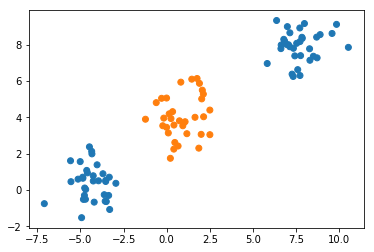

In [17]:
X, y = make_blobs(random_state=3)
y = (y == 0).astype(np.int)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

In [18]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)

In [19]:
X.shape, X_poly.shape

((100, 2), (100, 5))

In [20]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [21]:
linear_svm = SVC(kernel="linear").fit(X_poly, y)
poly_svm = SVC(kernel="poly", degree=2, coef0=1).fit(X, y)

In [22]:
linear_svm.coef_

array([[ 0.139,  0.06 , -0.201,  0.048,  0.019]])

In [23]:
linear_svm.dual_coef_

array([[-0.03 , -0.003,  0.003,  0.03 ]])

In [24]:
linear_svm.support_

array([ 1, 26, 42, 62], dtype=int32)

In [25]:
poly_svm.dual_coef_

array([[-0.057, -0.   , -0.012,  0.008,  0.062]])

In [26]:
poly_svm.support_

array([ 1, 26, 41, 42, 62], dtype=int32)

In [27]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

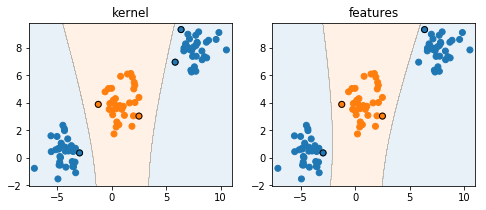

In [29]:
colors = [plt.cm.Vega10(0), plt.cm.Vega10(0), plt.cm.Vega10(1), plt.cm.Vega10(1)]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for ax, model, name in zip(axes, [poly_svm, make_pipeline(poly, linear_svm)], ["kernel", "features"]):
    ax.set_title(name)
    support_vectors = getattr(model, "support_", None)
    if support_vectors is None:
        support_vectors = model.steps[1][1].support_
    predictions = model.predict(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.1, colors=colors)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1)
    ax.set_xlim(x_lin[0], x_lin[-1])
    ax.set_ylim(y_lin[0], y_lin[-1])
plt.savefig("images/poly_kernel_features.png")

# Scaling with number of samples

In [ ]:
from time import time
from sklearn.svm import LinearSVC

linear, kernel = [], []
samples = [100, 1000, 10000, 100000] #, 1e6, 1e7]
for n_samples in samples:
    X, y = make_blobs(n_samples=int(n_samples), random_state=0)
    y = (y == 0).astype(np.int)
    X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)

    tick = time()
    LinearSVC(dual=False).fit(X_poly, y)
    linear.append(time() - tick)
    tick = time()
    SVC(kernel="poly", degree=2, coef0=1).fit(X, y)
    kernel.append(time() - tick)

In [29]:
kernel

[0.0007464885711669922,
 0.00855708122253418,
 0.9304783344268799,
 99.97169518470764]

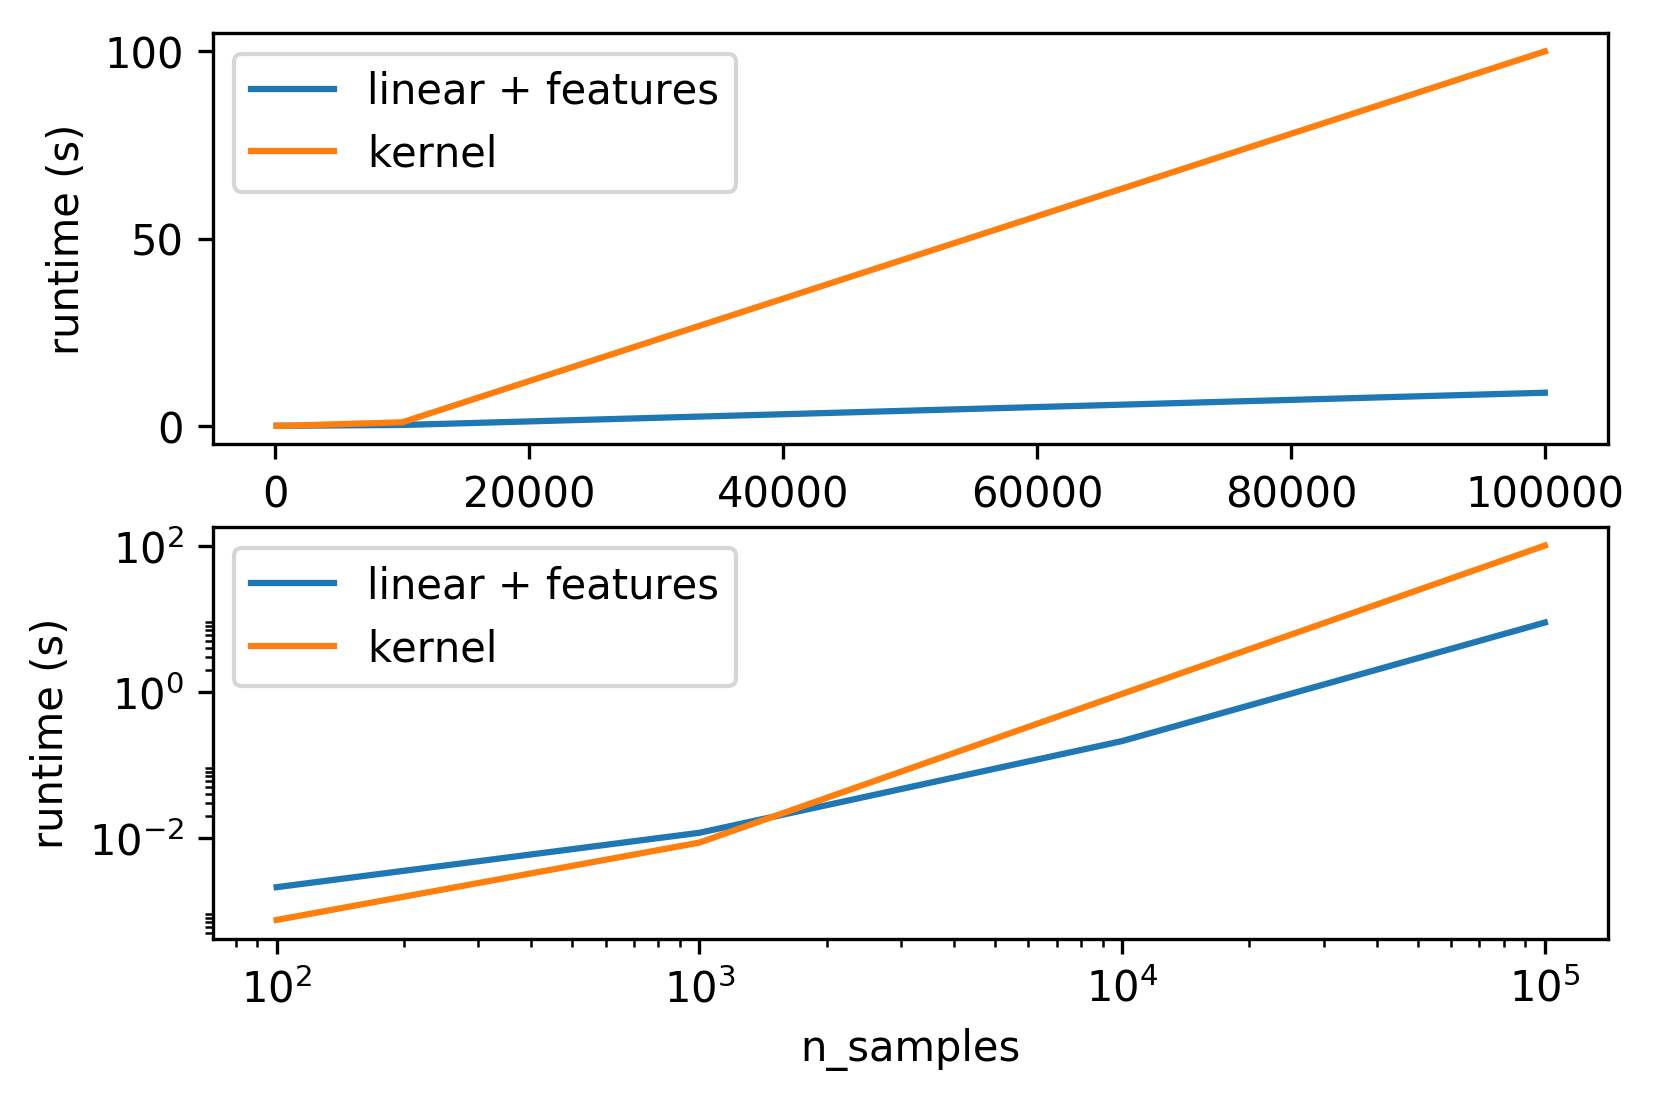

In [33]:
fig, axes = plt.subplots(2, 1)
for ax in axes:
    ax.plot(samples, linear, label="linear + features")
    ax.plot(samples, kernel, label="kernel")
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("n_samples")
    ax.legend()
axes[1].set_xscale("log")
axes[1].set_yscale("log")

# Scaling with n_features # FIXME NOT VERY GOOD

In [51]:
from sklearn.datasets import make_classification
linear, kernel = [], []
features = []
for n_features in features:
    X, y = make_classification(n_samples=10000, random_state=0, n_features=int(n_features))
    y = (y == 0).astype(np.int)
    X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

    tick = time()
    LinearSVC(loss="hinge").fit(X_poly, y)
    linear.append(time() - tick)
    tick = time()
    SVC(kernel="poly", degree=2, coef0=1).fit(X, y)
    kernel.append(time() - tick)

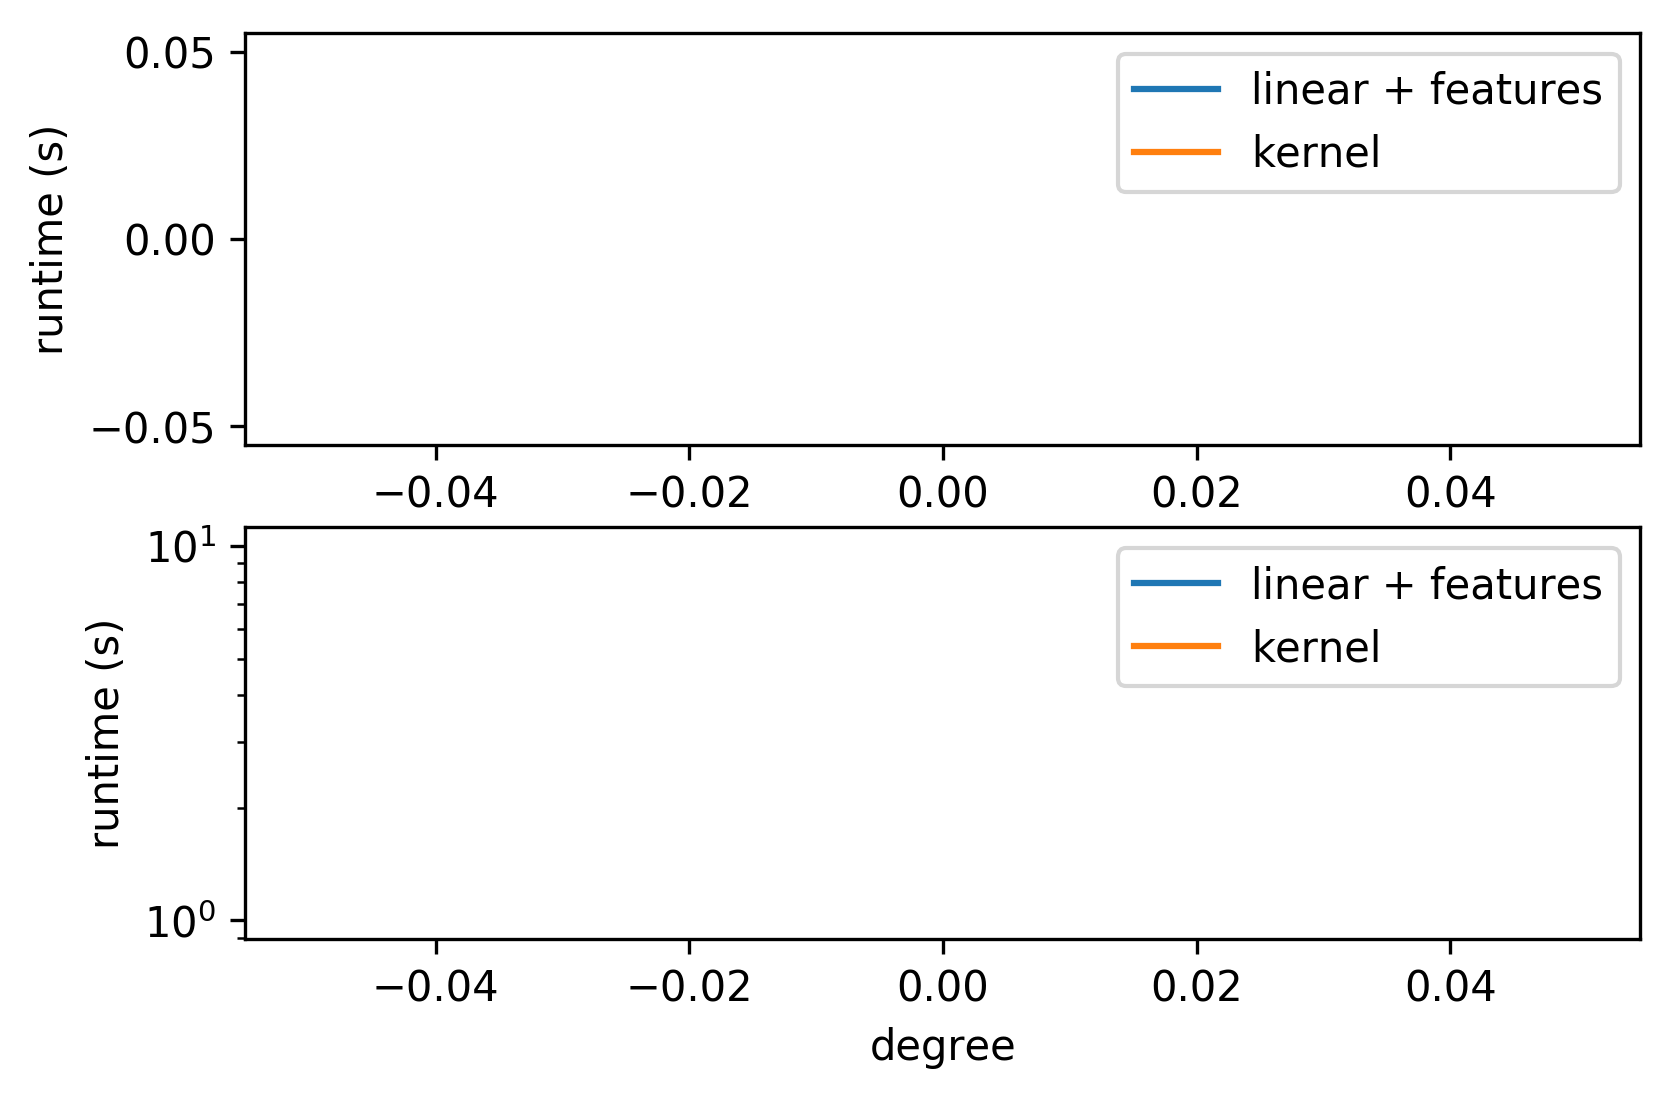

In [52]:
fig, axes = plt.subplots(2, 1)
for ax in axes:
    ax.plot(features, linear, label="linear + features")
    ax.plot(features, kernel, label="kernel")
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("degree")
    ax.legend()
axes[1].set_yscale("log")

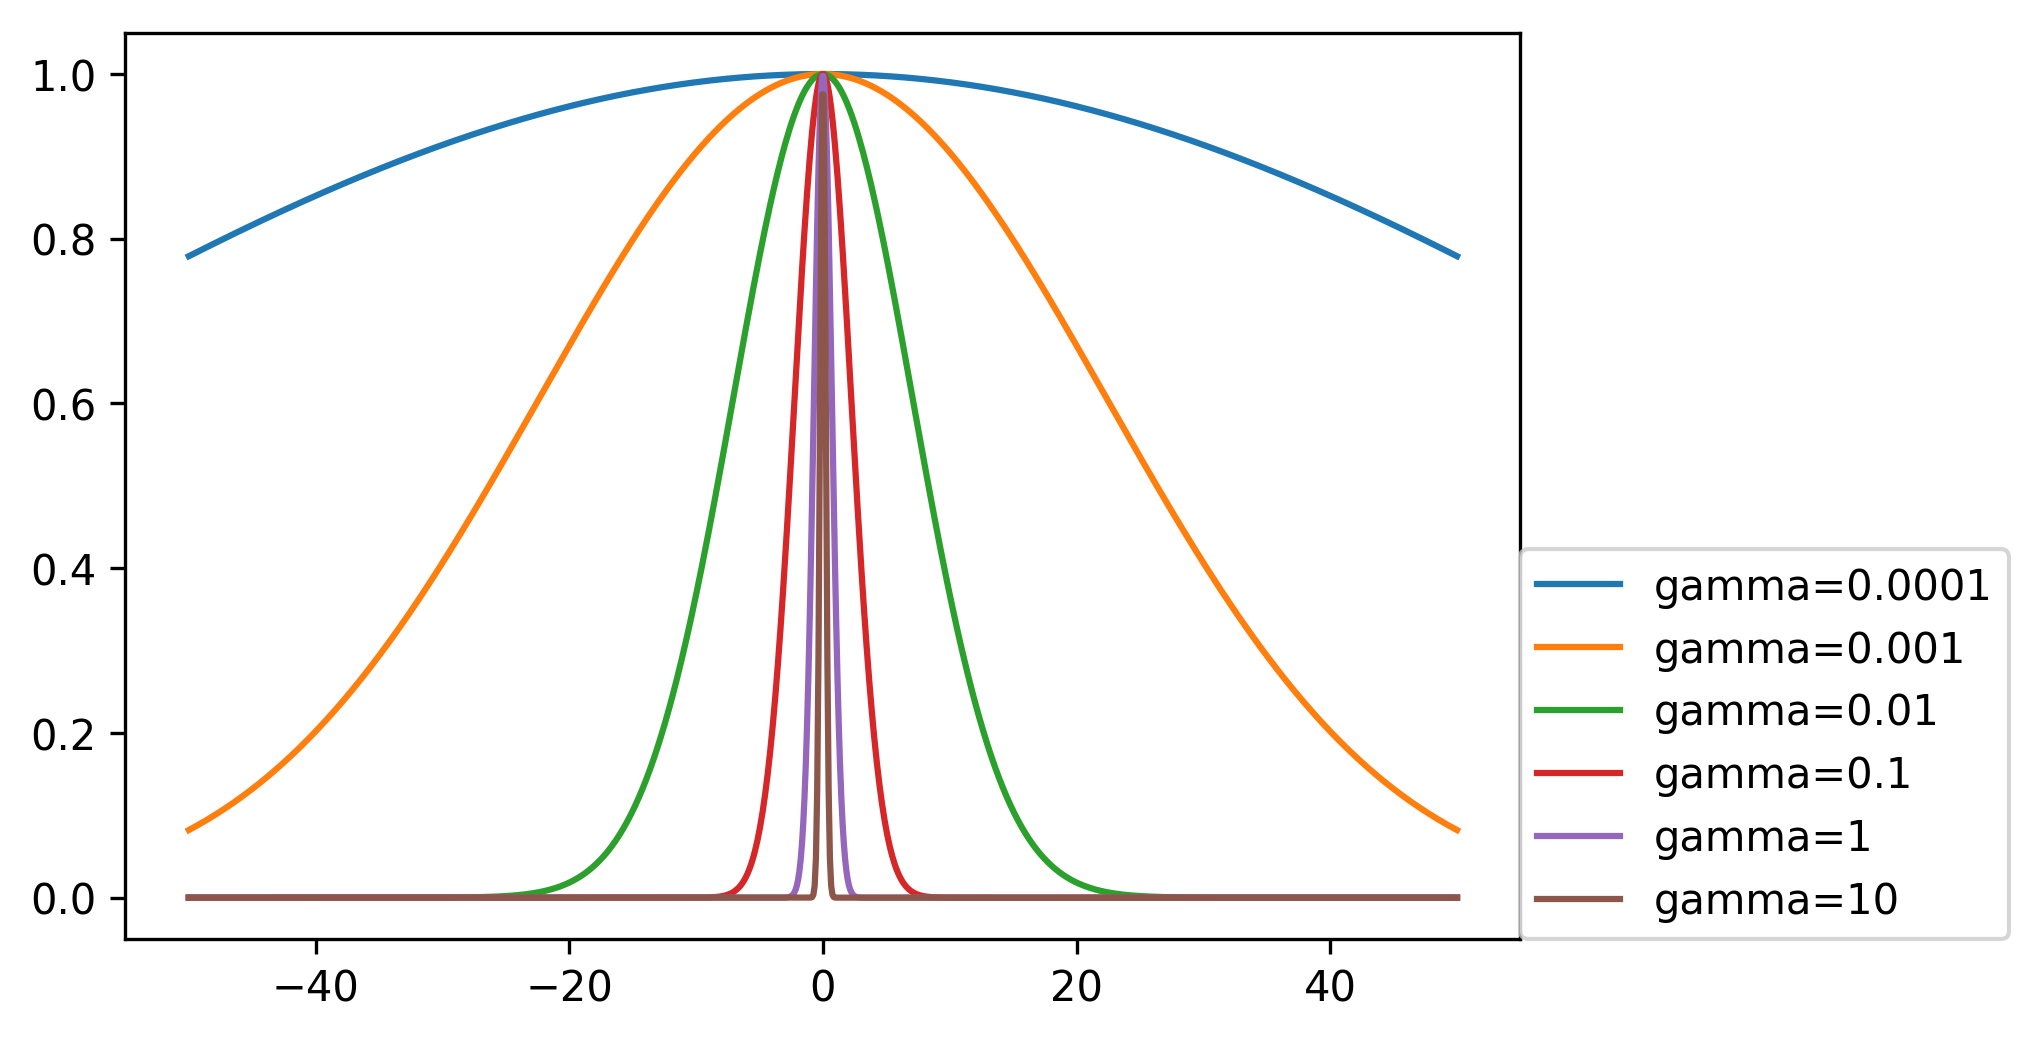

In [26]:
line = np.linspace(-50, 50, 1000)
def rbf(gamma):
    return np.exp(-gamma * line**2)

for gamma in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    plt.plot(line, rbf(gamma), label="gamma={}".format(gamma))
plt.legend(loc=(1, 0))

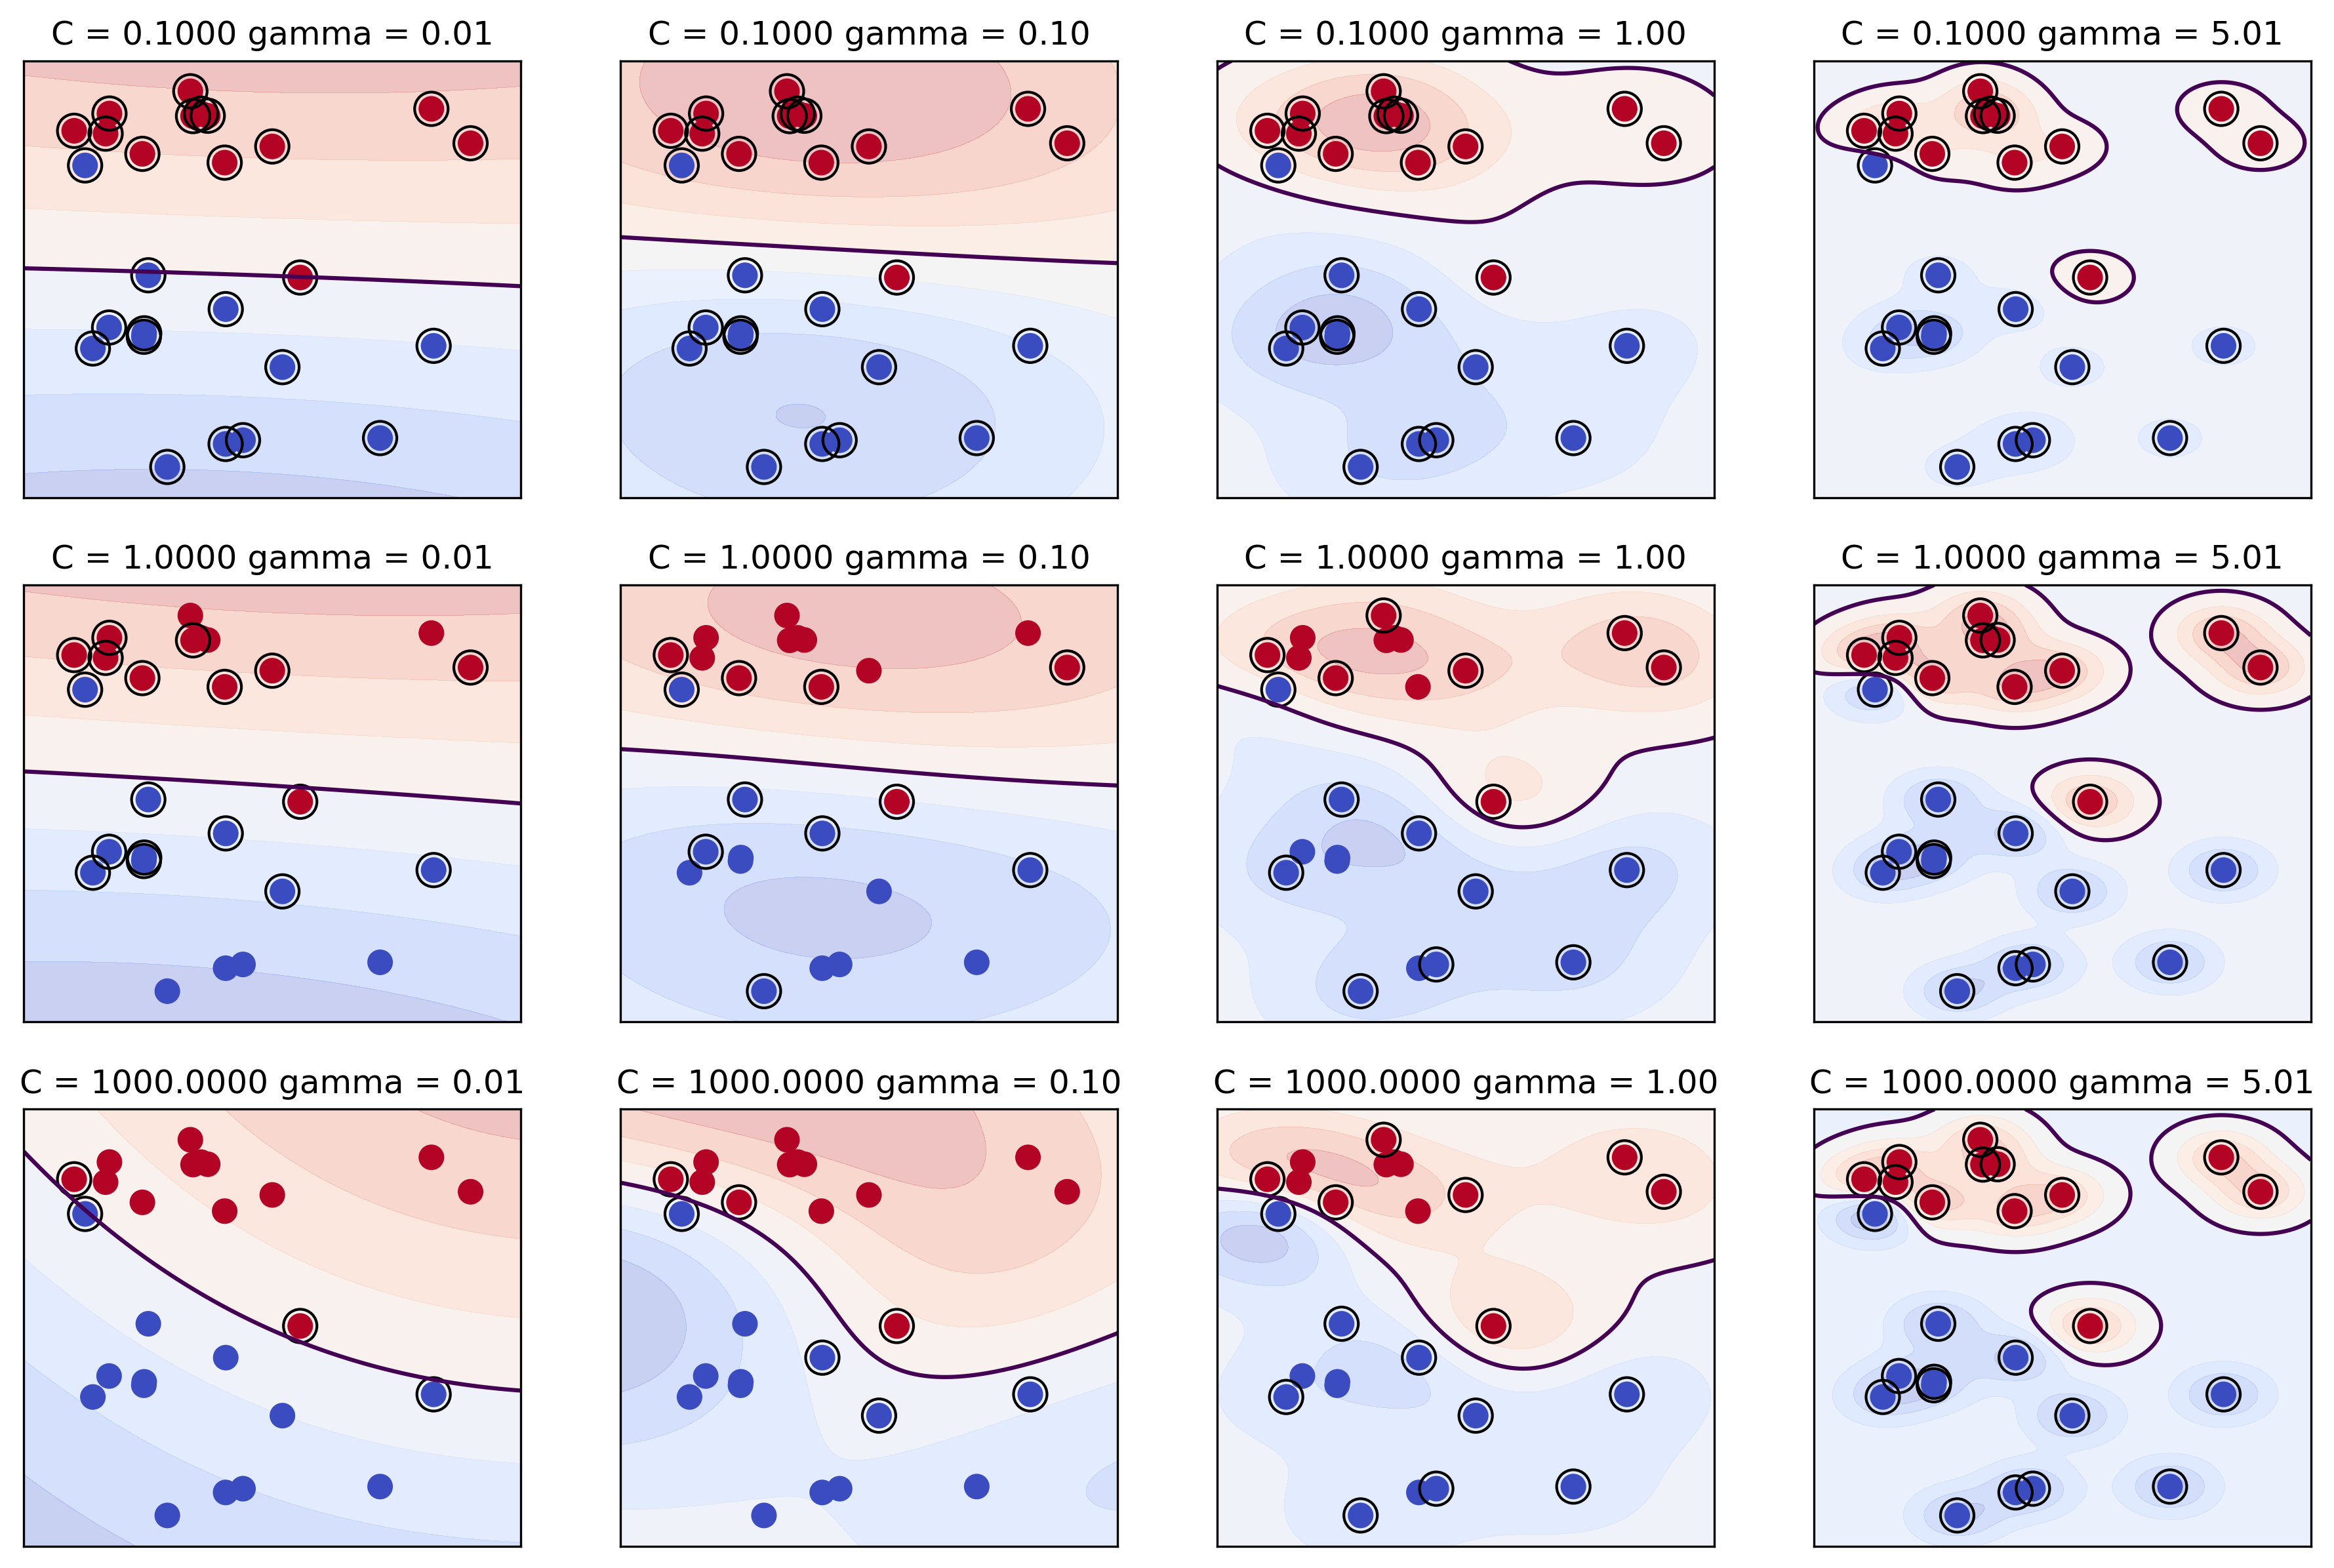

In [94]:
colors = [plt.cm.Vega10(0), plt.cm.Vega10(0), plt.cm.Vega10(1), plt.cm.Vega10(1)]

def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

def plot_svm(log_C, log_gamma, ax=None):
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    if ax is None:
        ax = plt.gca()
    predictions = svm.decision_function(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.3, cmap='coolwarm') #, colors=colors)
    ax.contour(x_grid, y_grid, predictions.reshape(x_grid.shape), c='k', levels=[0])

    # plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='coolwarm')
    # plot support vectors
    support_vectors = svm.support_
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1, s=150)
    ax.set_title("C = %.4f gamma = %.2f" % (C, gamma))

X, y = make_handcrafted_dataset()

# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
    
fig, axes = plt.subplots(3, 4, figsize=(15, 10), subplot_kw={'xticks':(), 'yticks': ()})

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, [-2, -1, 0, .7]):
        plot_svm(log_C=C, log_gamma=gamma, ax=a)

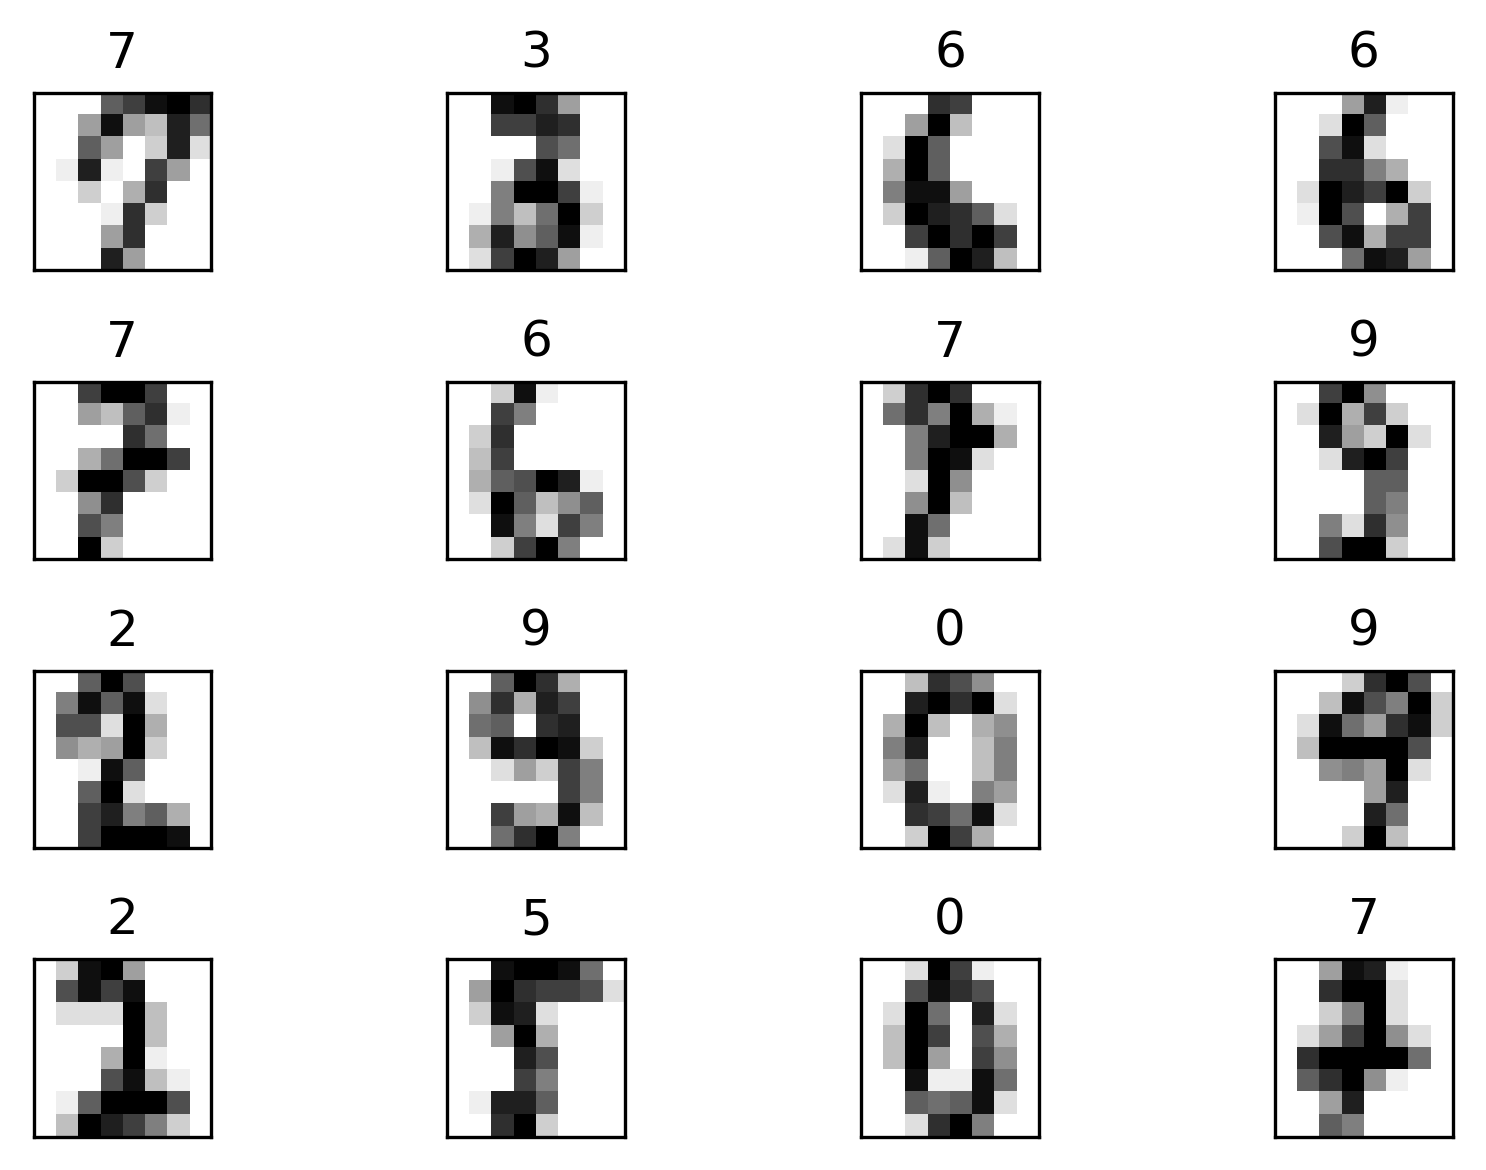

In [3]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(X_train, y_train, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

In [109]:
scaled_svc = make_pipeline(StandardScaler(), SVC())
print(np.mean(cross_val_score(SVC(), X_train, y_train, cv=10)))
print(np.mean(cross_val_score(scaled_svc, X_train, y_train, cv=10)))

0.578282235299
0.978450806169


In [122]:
# X_train.std() is also good for global scaling - if the features were on the same scale.
# this dataset is very atypical.
print(np.mean(cross_val_score(SVC(gamma=(1. / (X_train.shape[1] * X_train.std()))), X_train, y_train, cv=10)))

0.98730879194


In [155]:
np.set_printoptions(precision=6, suppress=True)
# using pipeline of scaler and SVC. Could also use SVC and rescale gamma
param_grid = {'svc__C': np.logspace(-3, 2, 6),
              'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
param_grid

{'svc__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]),
 'svc__gamma': array([ 0.000001,  0.000007,  0.000074,  0.000742,  0.007424,  0.074239])}

In [156]:
grid = GridSearchCV(scaled_svc, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__gamma': array([ 0.     ,  0.00001,  0.00007,  0.00074,  0.00742,  0.07424]), 'svc__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [157]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_svc__C,param_svc__gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.302664,0.018361,0.136600,0.139290,0.001,7.4239e-07,"{'svc__gamma': 7.42390497402e-07, 'svc__C': 0....",21,0.1,0.101906,...,0.1,0.10189,0.1,0.10189,0.1,0.10189,0.009753,0.000946,0.108009,0.112561
1,0.308887,0.019122,0.136600,0.139290,0.001,7.4239e-06,"{'svc__gamma': 7.42390497402e-06, 'svc__C': 0....",21,0.1,0.101906,...,0.1,0.10189,0.1,0.10189,0.1,0.10189,0.016427,0.001450,0.108009,0.112561
2,0.301836,0.018198,0.136600,0.139290,0.001,7.4239e-05,"{'svc__gamma': 7.42390497402e-05, 'svc__C': 0....",21,0.1,0.101906,...,0.1,0.10189,0.1,0.10189,0.1,0.10189,0.009574,0.000606,0.108009,0.112561
3,0.301537,0.018679,0.137342,0.139372,0.001,0.00074239,"{'svc__gamma': 0.000742390497402, 'svc__C': 0....",19,0.1,0.101906,...,0.1,0.10189,0.1,0.10189,0.1,0.10189,0.006741,0.001498,0.110271,0.112808
4,0.300095,0.018407,0.135115,0.140194,0.001,0.0074239,"{'svc__gamma': 0.00742390497402, 'svc__C': 0.001}",33,0.1,0.101906,...,0.1,0.10189,0.1,0.10189,0.1,0.10189,0.013393,0.000923,0.103486,0.115275


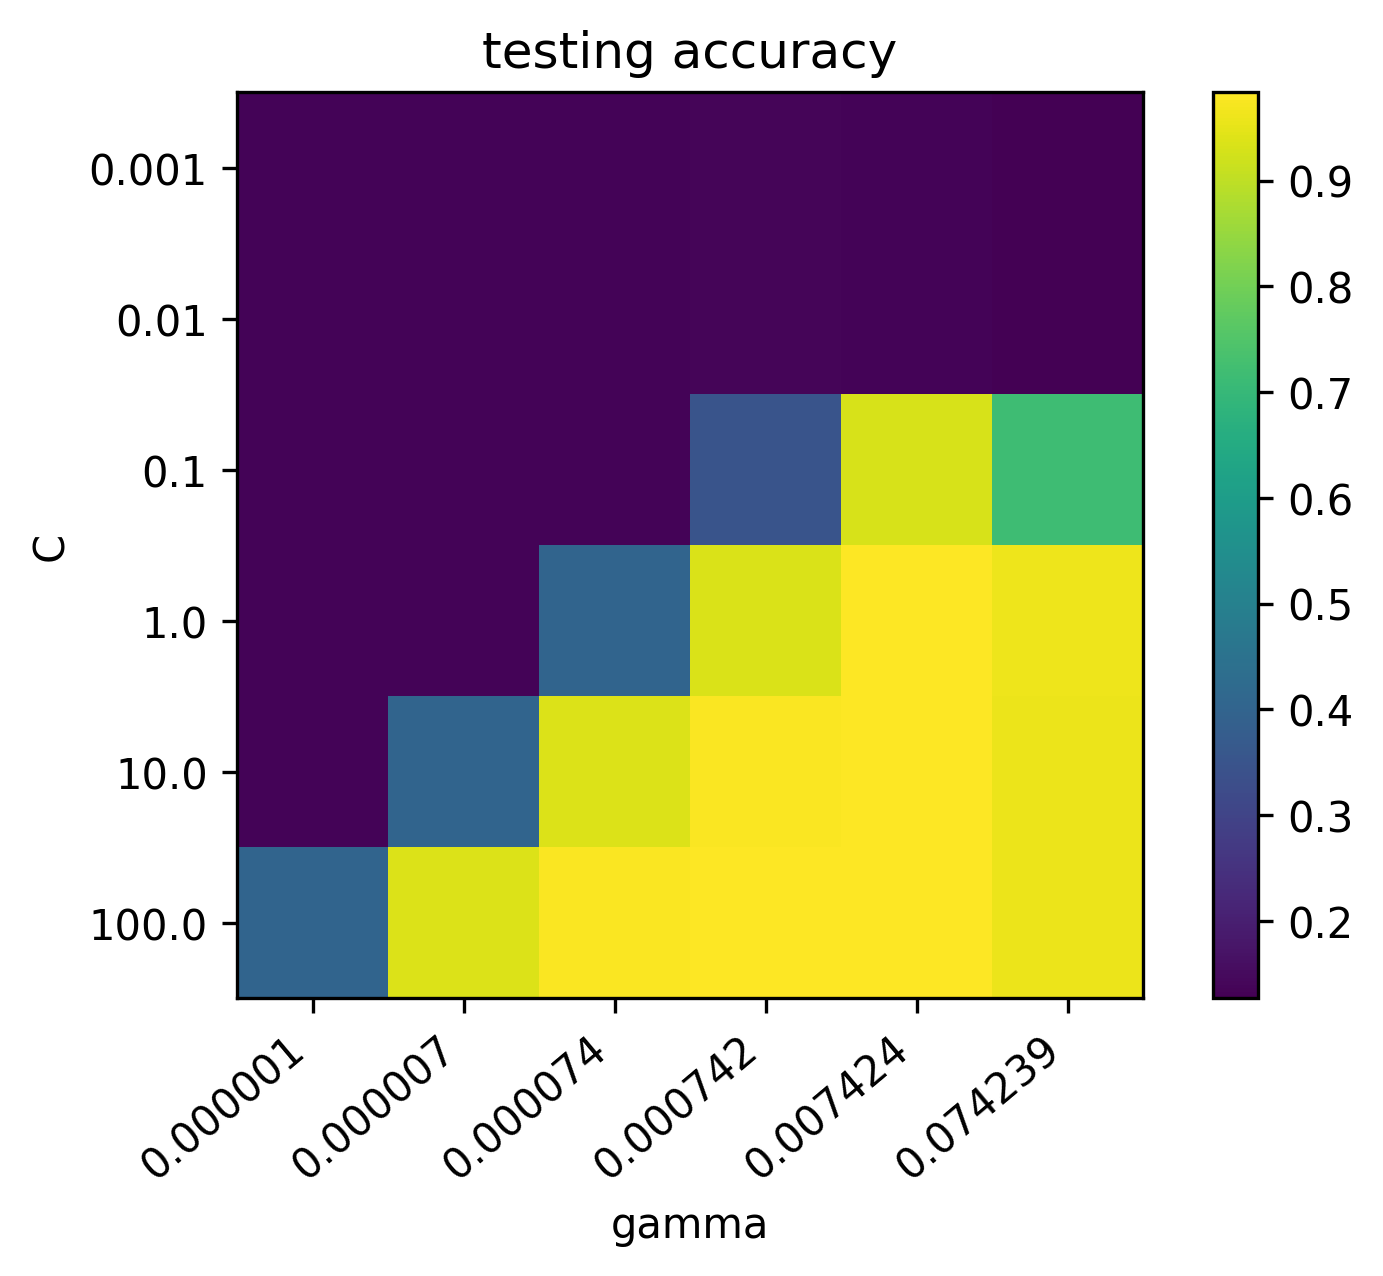

In [168]:
plt.title("testing accuracy")
plt.imshow(results.mean_test_score.values.reshape(6, 6))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

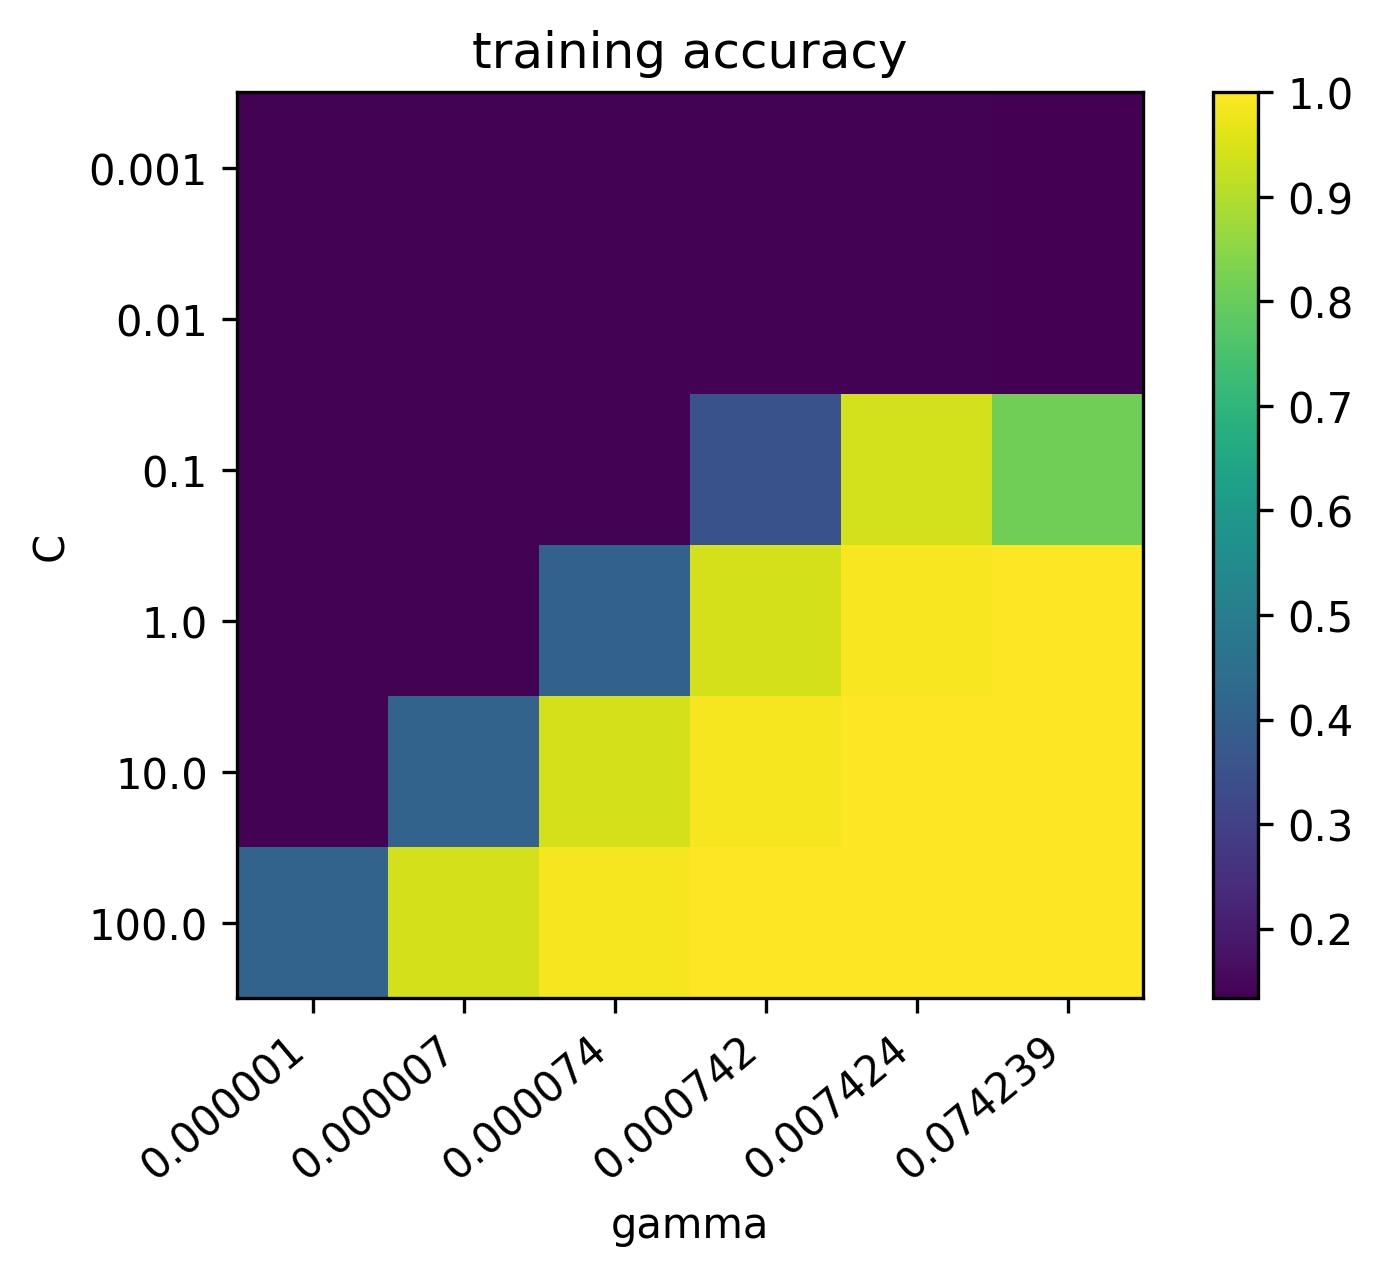

In [169]:
plt.title("training accuracy")
plt.imshow(results.mean_train_score.values.reshape(6, 6))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

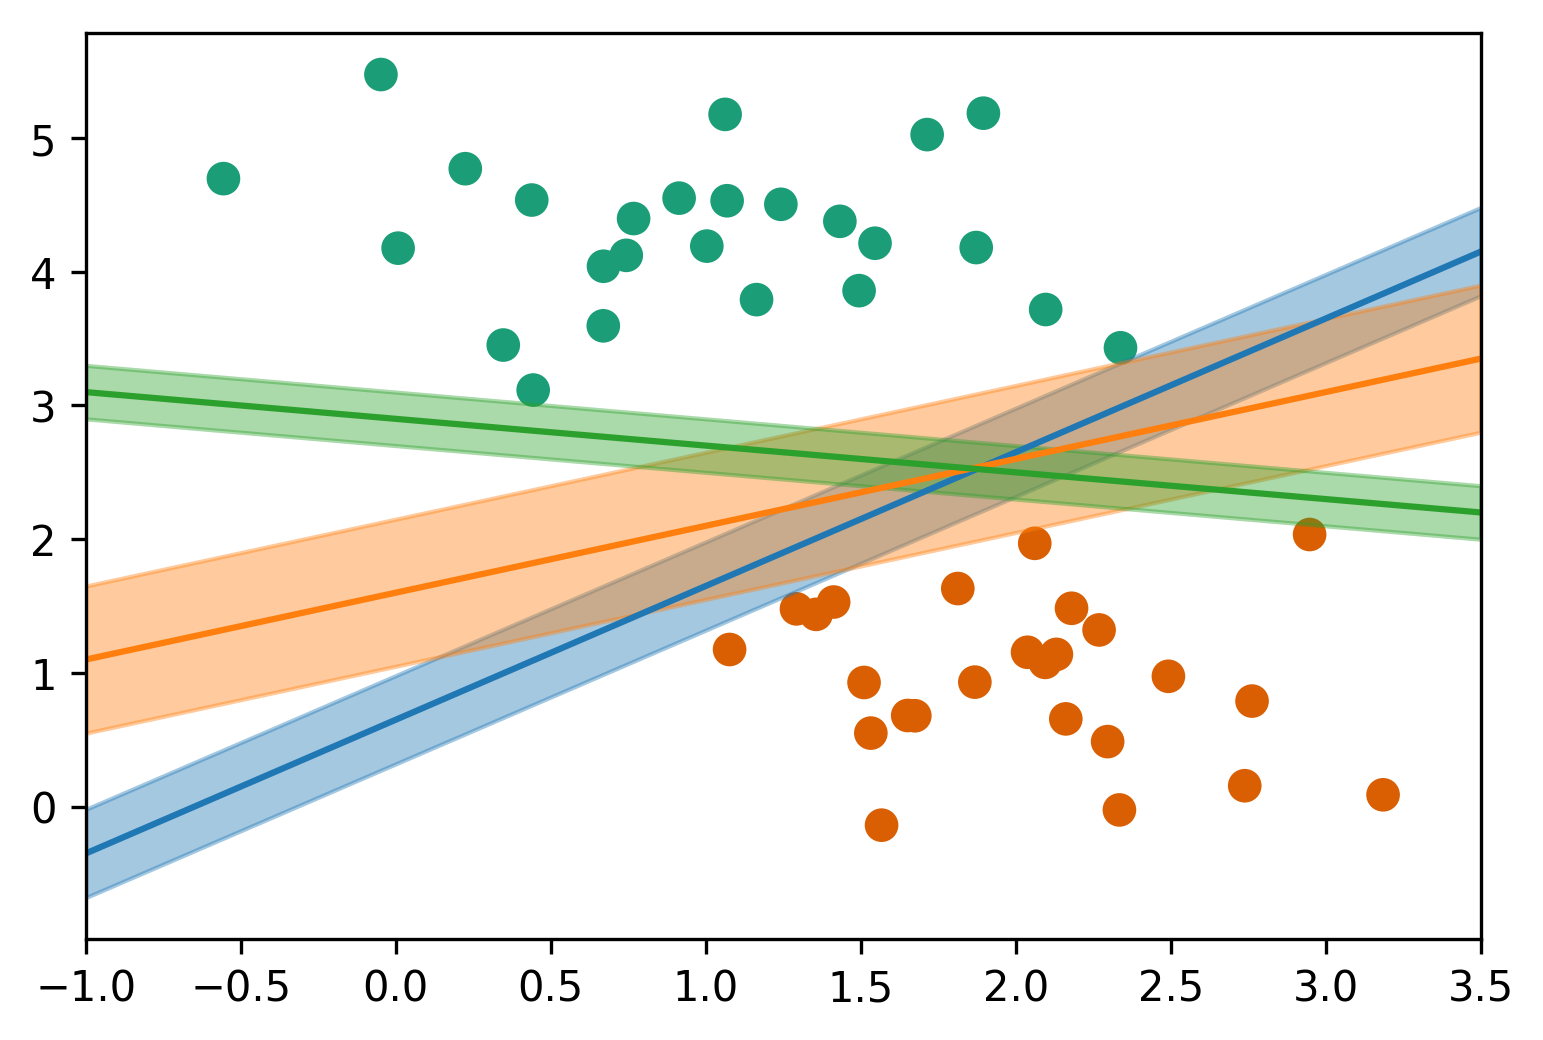

In [204]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y), s=50);
plt.xlim(-.6, 3.5)

xfit = np.linspace(-1, 3.5)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    line, = plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     alpha=0.4, color=line.get_color())

plt.xlim(-1, 3.5);

(-0.59999999999999998, 3.5)

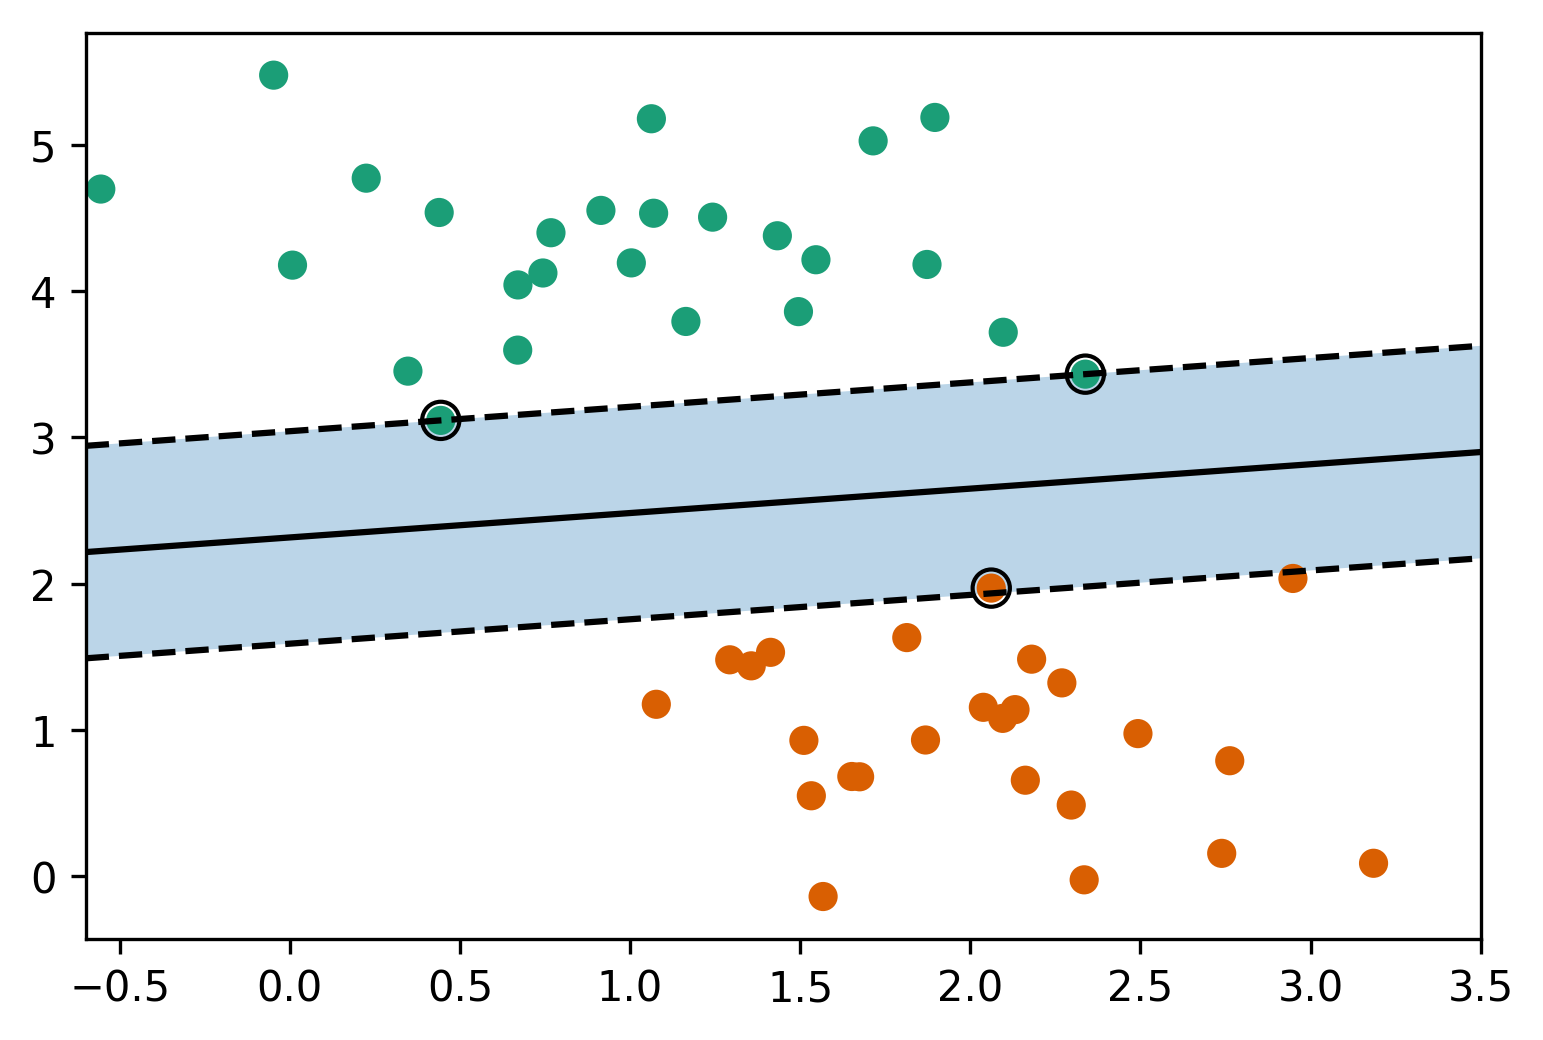

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-.6, 3.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')

plt.xlim(xx[0], xx[-1])

(-0.59999999999999998, 3.5)

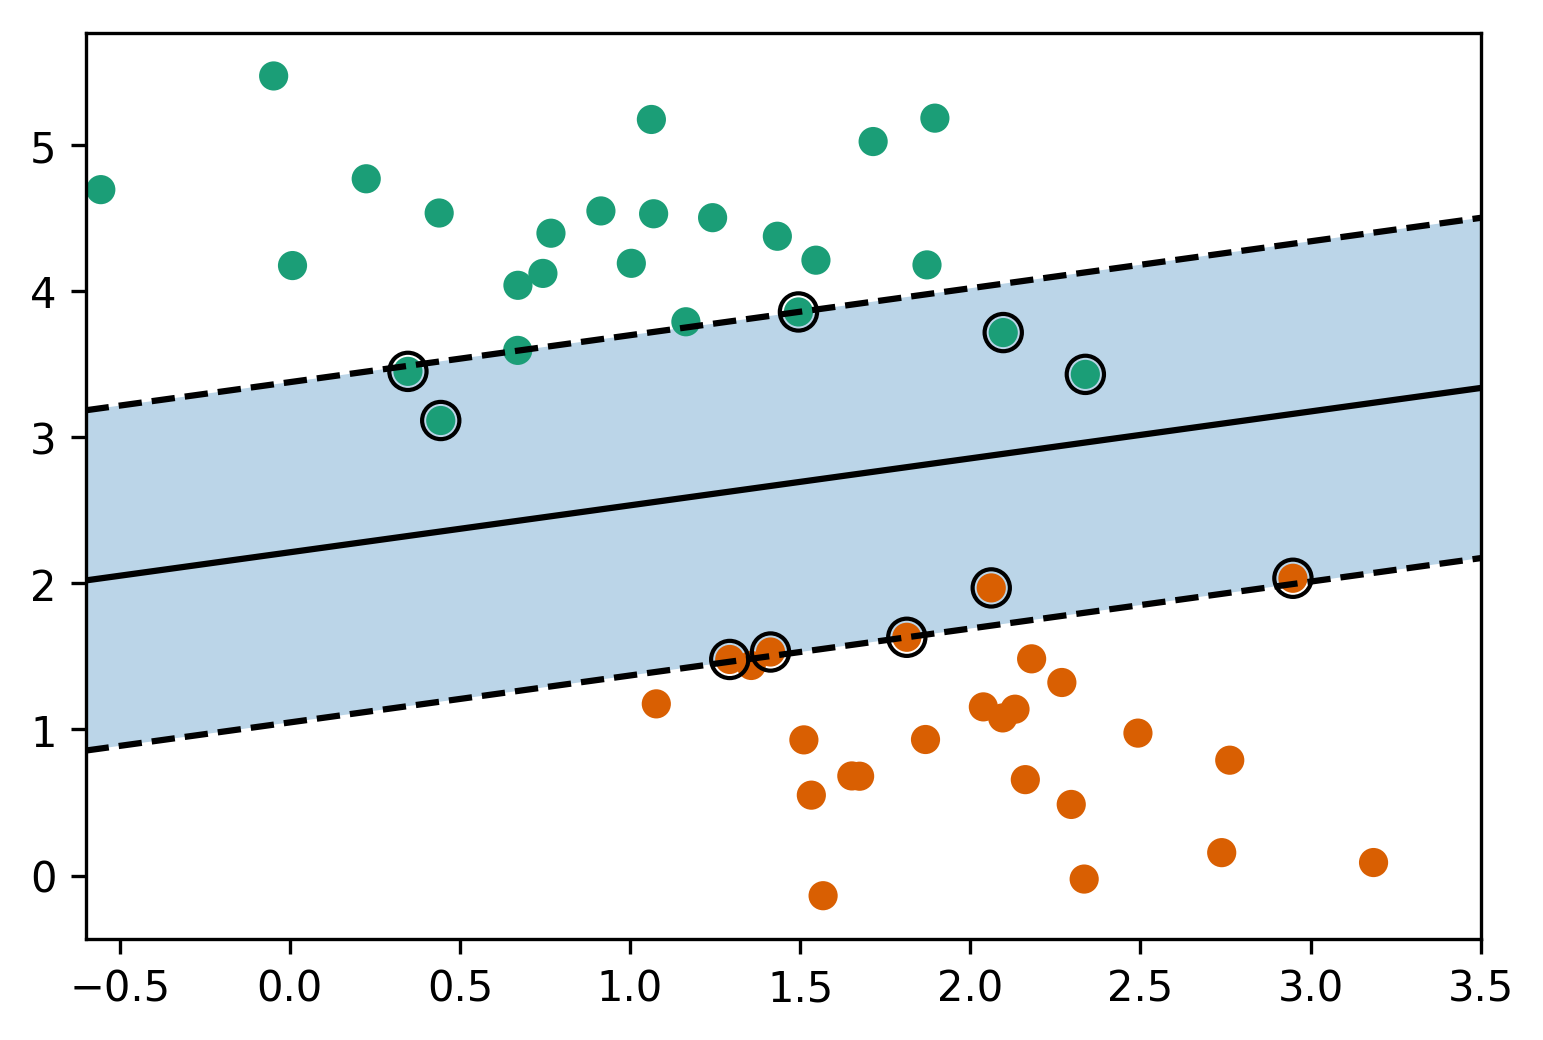

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model
clf = svm.SVC(kernel='linear', C=.1)
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-.6, 3.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')

plt.xlim(xx[0], xx[-1])

In [ ]:
from sklearn.kernel_approximationmation import RBFSampler
gamma = grid.best_params_['svc__gamma']
approx_rbf = RBFSampler(gamma=gamma, n_features=100)
approx_rbf.tran


Support Vector Regression (SVR) using linear and non-linear kernels

Toy example of 1D regression using linear, polynomial and RBF kernels.




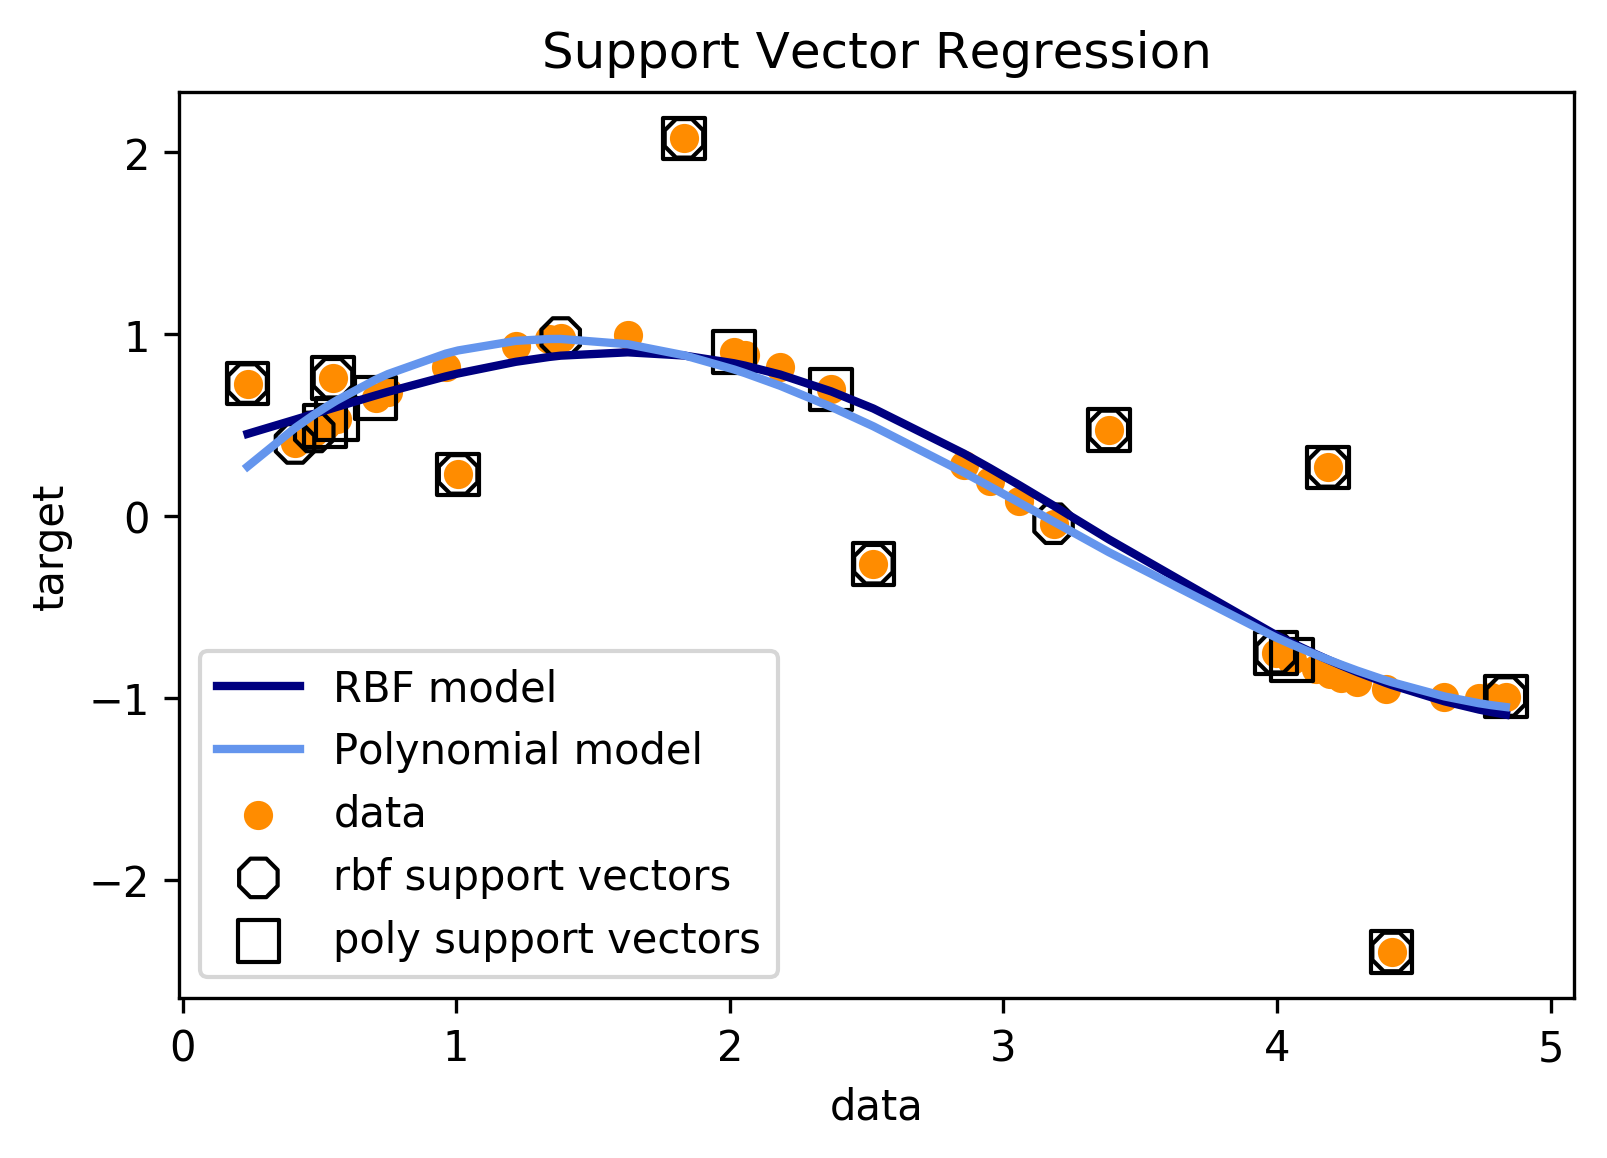

In [249]:
"""
===================================================================
Support Vector Regression (SVR) using linear and non-linear kernels
===================================================================

Toy example of 1D regression using linear, polynomial and RBF kernels.

"""
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')

plt.scatter(X[svr_rbf.support_], y[svr_rbf.support_], facecolor="none", edgecolor="k", marker='8',
            label='rbf support vectors', s=100)
plt.scatter(X[svr_poly.support_], y[svr_poly.support_], facecolor="none", edgecolor="k", marker='s',
            label='poly support vectors', s=100)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [257]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

In [4]:
from sklearn.kernel_approximation import RBFSampler
gamma = 1. / (X_train.shape[1] * X_train.std())
approx_rbf = RBFSampler(gamma=gamma, n_components=5000)
print(X_train.shape)
X_train_rbf = approx_rbf.fit_transform(X_train)
print(X_train_rbf.shape)

(1347, 64)
(1347, 5000)


In [262]:
np.mean(cross_val_score(LinearSVC(), X_train, y_train, cv=10))

0.94587717101873703

In [275]:
np.mean(cross_val_score(SVC(gamma=gamma), X_train, y_train, cv=10))

0.98730879194042775

In [278]:
np.mean(cross_val_score(LinearSVC(), X_train_rbf, y_train, cv=10))

0.98352851106359773

In [5]:
from sklearn.kernel_approximation import Nystroem
nystroem = Nystroem(gamma=gamma, n_components=200)
X_train_ny = nystroem.fit_transform(X_train)
print(X_train_ny.shape)

(1347, 200)


In [6]:
from sklearn.svm import LinearSVC

In [7]:
np.mean(cross_val_score(LinearSVC(), X_train_ny, y_train, cv=10))

0.97405989084114819

In [21]:
rng = np.random.RandomState(0)
w = rng.normal(size=(X_train.shape[1], 100))
X_train_wat = np.tanh(scale(np.dot(X_train, w)))
print(X_train_wat.shape)

(1347, 100)


In [22]:
np.mean(cross_val_score(LinearSVC(), X_train_wat, y_train, cv=10))

0.96354231101095089